In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [106]:
df = pd.read_csv('combined_data.csv')

df.head()

,symbol,time,transaction_count,large_transaction_count,average_transaction_value,high,low,open,close,volumeto,reddit_comments_per_day,total_avg_transaction_value,7_day_total_avg_transaction_value,7_day_large_transaction_count,7_day_reddit_comments_per_day,7_day_volumeto
0,BTC,1459382400,206476,1747,10.601309,417.16,411.45,412.44,415.66,17407273.19,0.0,2.188916e+06,NaN,NaN,NaN,NaN
1,BTC,1459468800,211922,1668,10.293830,416.86,412.79,415.66,415.64,15852511.01,0.0,2.181489e+06,NaN,NaN,NaN,NaN
2,BTC,1459555200,183503,1752,9.584394,420.09,415.09,415.64,418.51,13137339.89,0.0,1.758765e+06,NaN,NaN,NaN,NaN
3,BTC,1459641600,178429,1405,8.752097,420.18,416.95,418.51,419.06,9591214.82,0.0,1.561628e+06,NaN,NaN,NaN,NaN
4,BTC,1459728000,208929,1444,10.204954,420.39,416.21,419.06,419.33,14031939.65,0.0,2.132111e+06,NaN,NaN,NaN,NaN


In [107]:
df = df.dropna()

In [108]:
df = df[df['7_day_reddit_comments_per_day'] > 0]

In [109]:
list = []

for i in range(0, len(df)-6):
    percent = (df.iloc[i+6,8] - df.iloc[i,7]) / df.iloc[i,7]
    value = (1 + percent) * df.iloc[i,7]
    list.append(value)

In [110]:
df = df.iloc[:-6,]

In [111]:
df['7_day_change'] = list

In [112]:
df.head()

,symbol,time,transaction_count,large_transaction_count,average_transaction_value,high,low,open,close,volumeto,reddit_comments_per_day,total_avg_transaction_value,7_day_total_avg_transaction_value,7_day_large_transaction_count,7_day_reddit_comments_per_day,7_day_volumeto,7_day_change
421,BTC,1495756800,333340,12684,8.413740,2616.52,2051.45,2306.96,2244.89,4.413427e+08,8437.50,2.804636e+06,3.211053e+06,14742.714286,1205.357143,3.404359e+08,2412.65
422,BTC,1495843200,331914,9375,8.006224,2322.37,1868.56,2244.89,2052.43,4.460340e+08,4130.02,2.657378e+06,3.190095e+06,14750.285714,1795.360000,3.785340e+08,2492.60
423,BTC,1495929600,308143,10415,9.043029,2300.52,2051.07,2052.43,2189.02,2.667661e+08,3314.15,2.786546e+06,3.257769e+06,14630.857143,2268.810000,3.936382e+08,2545.43
424,BTC,1496016000,321638,9577,7.850842,2337.35,2117.34,2189.02,2278.21,2.041016e+08,6428.57,2.525129e+06,3.143673e+06,13804.000000,3187.177143,3.694409e+08,2524.06
425,BTC,1496102400,347961,15138,10.996721,2329.26,2147.10,2278.21,2192.55,2.700691e+08,6676.97,3.826430e+06,3.102742e+06,13208.714286,4141.030000,3.720267e+08,2704.96


In [113]:
X = df[["7_day_total_avg_transaction_value", "7_day_large_transaction_count","7_day_reddit_comments_per_day","7_day_volumeto"]]
y = df["7_day_change"].values.reshape(-1, 1)
print(X.shape, y.shape)

(1572, 4) (1572, 1)


In [114]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [115]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [116]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test) 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.689454376456074
Testing Score: 0.618144849819263


Text(0.5, 1.0, 'Residual Plot')

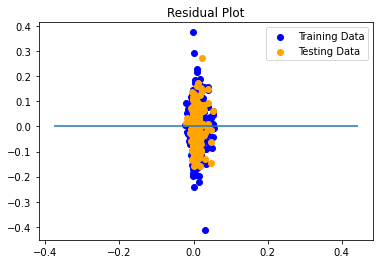

In [100]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")